# Proyek Klasifikasi Gambar: Buah-buahan (Fruits Classification🍇)
- **Nama:** Nurul Itsnaini
- **Email:** nurul.itsnaini1711@gmail.com
- **ID Dicoding:** MC229D5X0883

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor library yang sering digunakan
import os
import shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor library visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor library untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor library untuk membangun model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# mengimpor library untuk mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading

In [2]:
# Mengimpor module yang digunakan untuk uploud file pada google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurulitsnaini17","key":"6f3f1a5b48fd8823c47883f83557d718"}'}

In [3]:
# Memindahkan dan memberi akses izin ke file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download data dari kaggle dataset
!kaggle datasets download -d utkarshsaxenadn/fruits-classification

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification
License(s): CC0-1.0


In [5]:
# unzip file yang telah didownload
!unzip fruits-classification.zip -d fruits_dataset

Streaming output truncated to the last 5000 lines.
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1950).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1952).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1953).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1955).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1956).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1957).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1958).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1959).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (196).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1960).jpeg  
  inflating: fruits_dataset/Fruits Classification/train/Grape/Grape (1961).jpeg  
  inflating: fruits_dataset/Fruits Classificatio

In [6]:
# Menggabungkan data train, test, dan valid menjadi satu data
# Direktori awal untuk train, test, dan valid
train_dir = "fruits_dataset/Fruits Classification/train"
test_dir = "fruits_dataset/Fruits Classification/test"
valid_dir = "fruits_dataset/Fruits Classification/valid"

# Direktori baru untuk dataset gabungan
completed_dir = "fruits_dataset/Fruits Classification/completed_dataset"

# Membuat direktori baru untuk dataset gabungan
os.makedirs(completed_dir, exist_ok=True)

# Menyalin file dan folder kelas dari folder train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(completed_dir, category), dirs_exist_ok=True)

# Menyalin file dan folder kelas dari folder test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(completed_dir, category), dirs_exist_ok=True)

# Menyalin file dan folder kelas dari folder valid
for category in os.listdir(valid_dir):
    category_dir = os.path.join(valid_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(completed_dir, category), dirs_exist_ok=True)

print("Data telah digabungkan di:", completed_dir)

Data telah digabungkan di: fruits_dataset/Fruits Classification/completed_dataset


In [36]:
from PIL import Image
import os

def print_images_resolution(directory):
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue

        unique_sizes = set()
        image_files = [f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"  [!] Gagal membuka {img_file}: {e}")

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print_images_resolution('fruits_dataset/Fruits Classification/completed_dataset')

Apple: 2000
- (149, 110)
- (206, 244)
- (147, 176)
- (99, 136)
- (177, 284)
- (201, 251)
- (112, 75)
- (183, 135)
- (186, 271)
- (189, 267)
- (276, 183)
- (145, 90)
- (162, 170)
- (82, 159)
- (93, 79)
- (334, 151)
- (280, 180)
- (194, 238)
- (272, 185)
- (257, 196)
- (111, 69)
- (284, 177)
- (134, 89)
- (306, 164)
- (183, 121)
- (298, 169)
- (244, 207)
- (233, 216)
- (250, 147)
- (125, 125)
- (345, 146)
- (138, 91)
- (237, 213)
- (130, 87)
- (177, 171)
- (149, 338)
- (325, 155)
- (105, 161)
- (213, 112)
- (130, 105)
- (182, 115)
- (192, 156)
- (194, 107)
- (221, 228)
- (224, 224)
- (73, 73)
- (189, 266)
- (276, 182)
- (202, 196)
- (73, 91)
- (149, 59)
- (145, 107)
- (225, 225)
- (154, 183)
- (106, 106)
- (167, 122)
- (130, 82)
- (216, 234)
- (282, 179)
- (96, 98)
- (99, 94)
- (274, 184)
- (294, 171)
- (153, 330)
- (255, 198)
- (286, 176)
- (185, 273)
- (131, 64)
- (98, 116)
- (197, 256)
- (244, 206)
- (181, 168)
- (84, 83)
- (189, 117)
- (213, 102)
- (208, 243)
- (317, 159)
- (228, 221

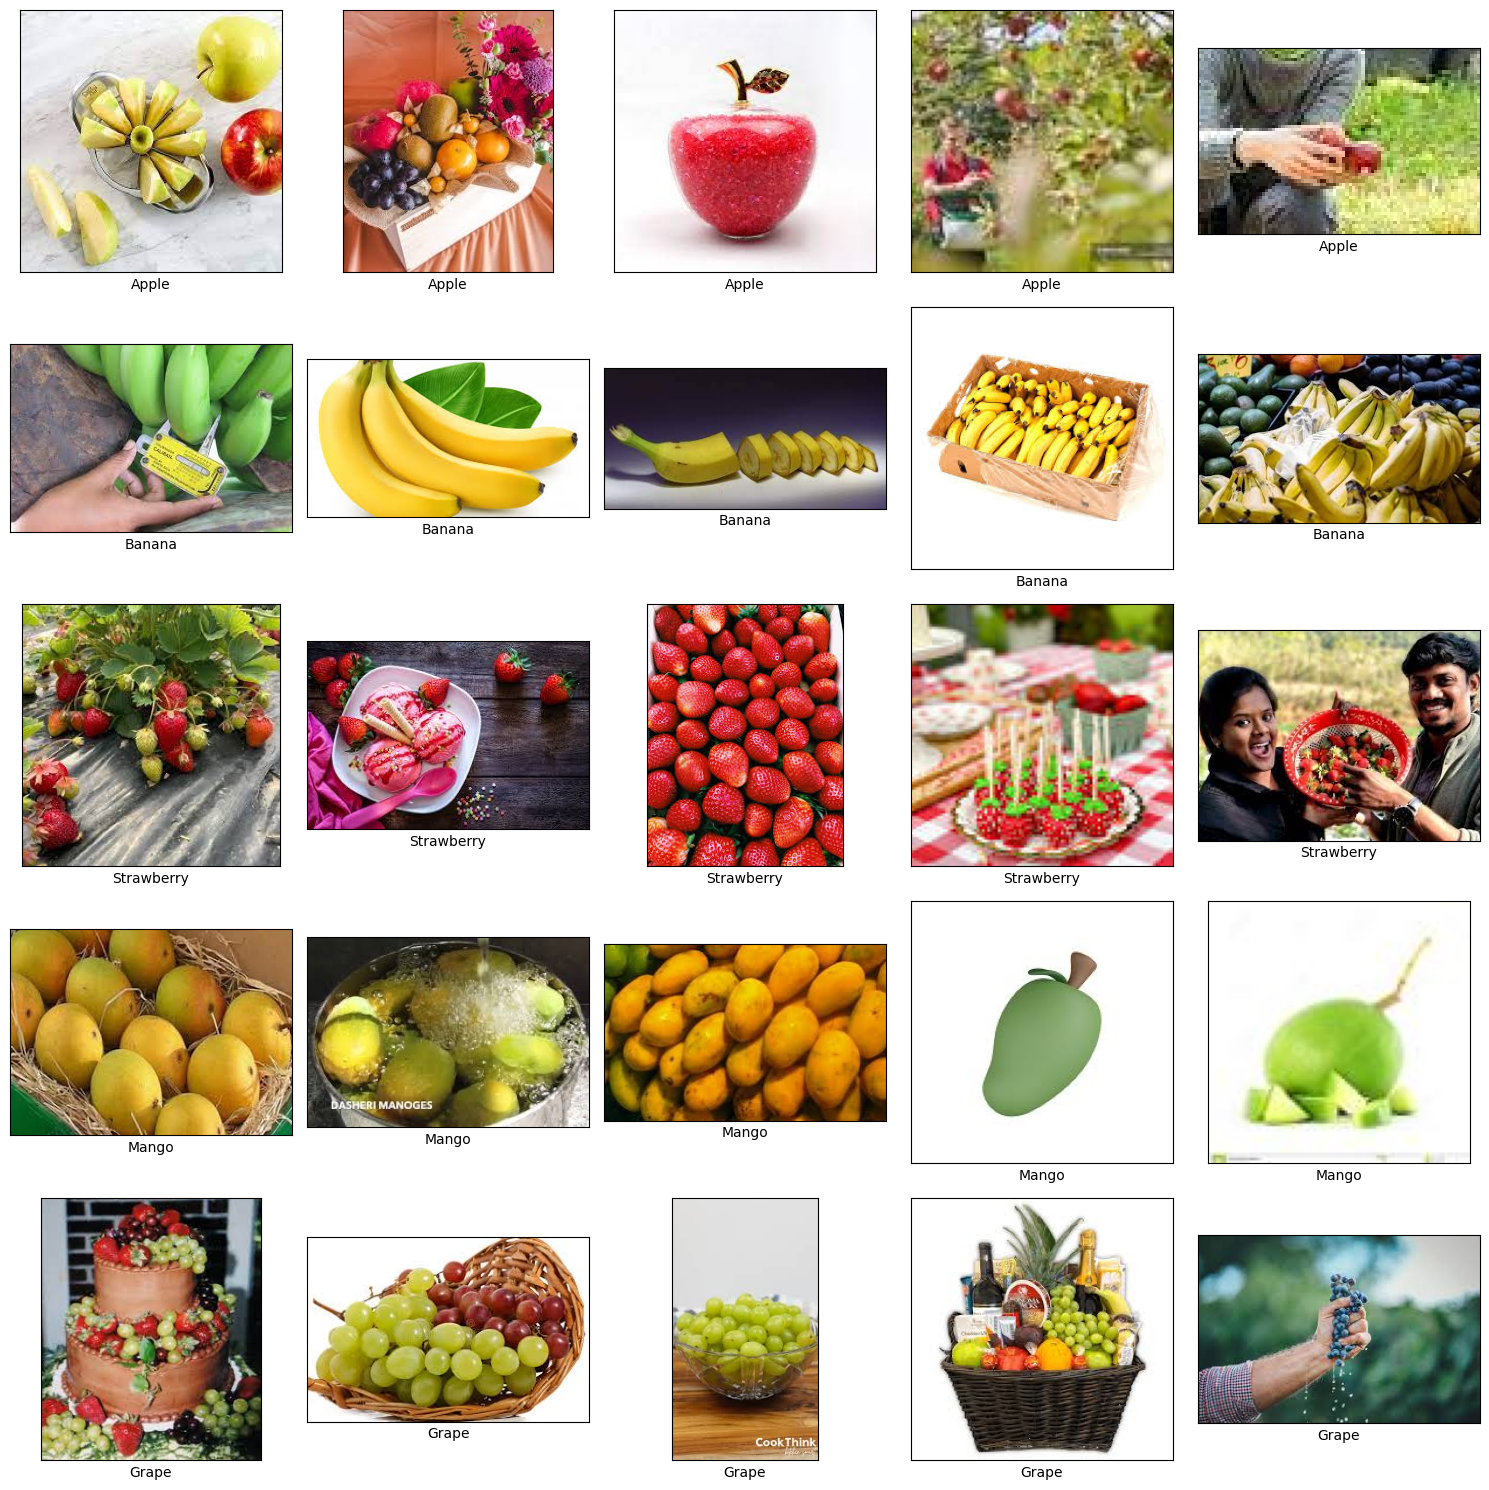

In [9]:
# Menampilkan sampel data dari semua kelas
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Membuat kamus yang menyimpan nama gambar untuk setiap kelas
fruit_images = {}

# Tentukan path sumber dataset buah
folder_path = 'fruits_dataset/Fruits Classification/'
folder_path_sub = os.path.join(folder_path, "completed_dataset")

# Mengisi kamus dengan list gambar dari masing-masing kelas
for i in os.listdir(folder_path_sub):
    fruit_images[i] = os.listdir(os.path.join(folder_path_sub, i))

# Menampilkan secara acak 5 gambar dari setiap kelas
fig, axs = plt.subplots(len(fruit_images.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(folder_path_sub)):
    images = np.random.choice(fruit_images[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(folder_path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()


### Data Preprocessing

#### Split Dataset

In [10]:
# Path penyimpanan dataset yang sudah digabung
mypath = 'fruits_dataset/Fruits Classification/completed_dataset'

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))
        file_name.append(name)

# Buat dataframe dari list yang sudah diisi
df = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Cek jumlah data per label
print(df.groupby(['labels']).size())

labels
Apple         2000
Banana        2000
Grape         2000
Mango         2000
Strawberry    2000
dtype: int64


In [11]:
# Split dataset menjadi data train (70%) dan sisa (test + validation 30%)
X_train, X_temp, y_train, y_temp = train_test_split(df['path'], df['labels'], test_size=0.3, random_state=300)

# Dari data sisa, split lagi menjadi test dan validation masing-masing 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=300)

# Menyatukan kedalam masing-masing dataframe
df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_valid = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'validation'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Gabungkan DataFrame
df_all = pd.concat([df_train, df_valid, df_test], ignore_index=True)

# Print hasil pembagian data
print('train size', len(df_train))
print('validation size', len(df_valid))
print('test size', len(df_test))

train size 7000
validation size 1500
test size 1500


In [12]:
# Memindah file hasil split kedalam masing-masing folder train,test, dan validation
# Membuat folder baru untuk data yang sudah di split
dataset_path = "Final_Fruits_Dataset/"

for index, row in tq(df_all.iterrows(), total=len(df_all)):
    file_path = row['path']

    destination_folder = os.path.join(dataset_path, row['set'], row['labels'])
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Menentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(destination_folder, destination_file_name)

    # Menyalin file dari sumber ke tujuan
    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)

  0%|          | 0/10000 [00:00<?, ?it/s]

#### Data Augmentasi dan Normalisasi

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=10.0,
    shear_range=0.2,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Final_Fruits_Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    'Final_Fruits_Dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    'Final_Fruits_Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


## Modelling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # output 5 kelas
])

# Kompilasi Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,012,229 (11.49 MB)

 Trainable params: 754,245 (2.88 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Menerapkan Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1  # Tambahin log biar tahu kapan stop
    ),
    ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,  # Lebih cepat turunin learning rate
        min_lr=1e-6,  # Batas bawah LR
    )
]

history_1 = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 120s 509ms/step - accuracy: 0.4781 - loss: 1.2751 - val_accuracy: 0.8213 - val_loss: 0.5259 - learning_rate: 1.0000e-04
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 99s 450ms/step - accuracy: 0.7448 - loss: 0.7064 - val_accuracy: 0.8420 - val_loss: 0.4554 - learning_rate: 1.0000e-04
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 99s 451ms/step - accuracy: 0.7916 - loss: 0.5977 - val_accuracy: 0.8513 - val_loss: 0.4145 - learning_rate: 1.0000e-04
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 98s 447ms/step - accuracy: 0.8106 - loss: 0.5472 - val_accuracy: 0.8533 - val_loss: 0.4100 - learning_rate: 1.0000e-04
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 97s 444ms/step - accuracy: 0.8316 - loss: 0.4938 - val_accuracy: 0.8607 - val_loss: 0.3998 - learning_rate: 1.0000e-04
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 449ms/step - accuracy: 0.8495 - loss: 0.4346 - val_accuracy: 0.8627 - val_loss: 0.3846 - learning_rate: 1.0000e-04
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 97s 

## Evaluasi dan Visualisasi

In [19]:
# Evaluasi model menggunakan data test
evaluation = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

# Menampilkan hasil evaluasi
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8650 - loss: 0.4407
Loss: 0.38046517968177795
Accuracy: 0.879755437374115


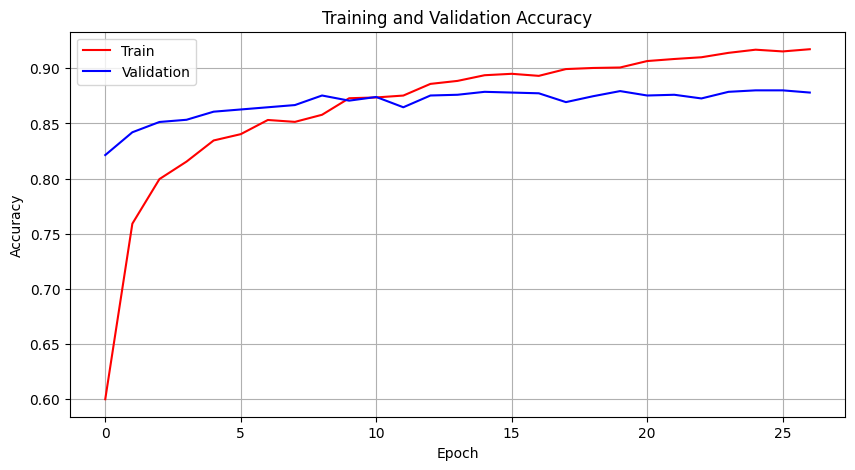

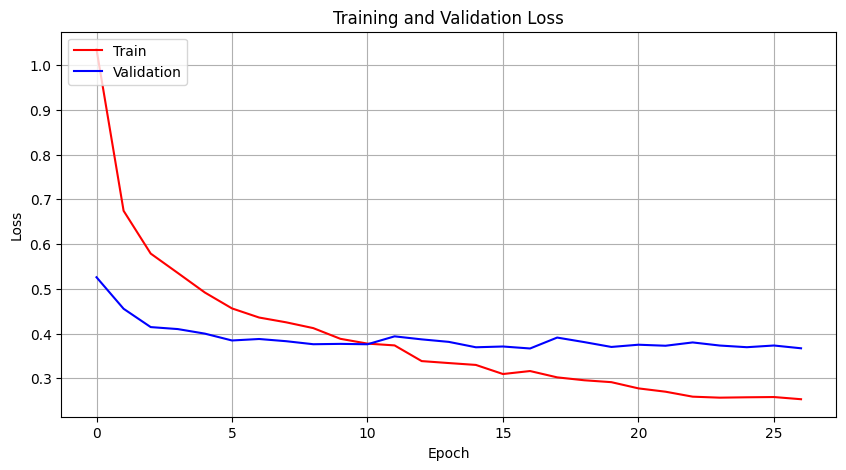

In [20]:
# Visualisasi
import matplotlib.pyplot as plt

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(len(acc))

# Plot akurasi data train terhadap akurasi data validation
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot loss data train terhadap loss data validation
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


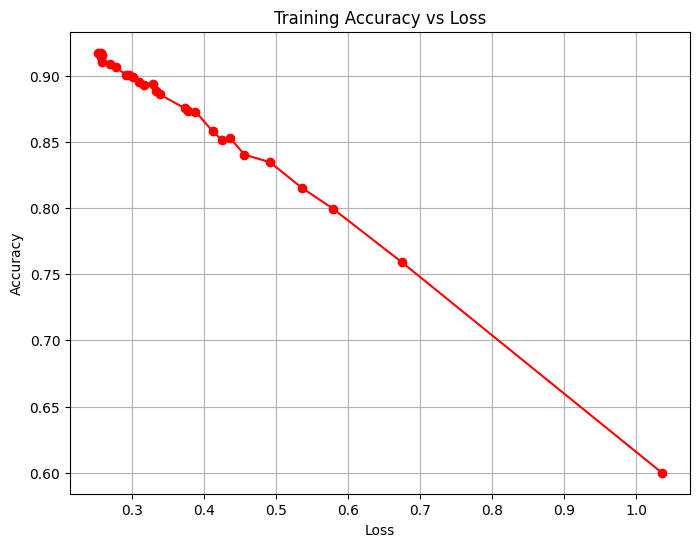

In [21]:
# Visualisasi akurasi terhadap loss pada data train
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss dari training saja
acc = history_1.history['accuracy']
loss = history_1.history['loss']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(loss, acc, 'ro-')  # merah, bulatan, garis
plt.title('Training Accuracy vs Loss')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Konversi Model

In [23]:
# Menyimpan model kedalam SavedModel
import tensorflow as tf
tf.saved_model.save(model, "saved_model/my_model")

In [28]:
# Menyimpan model ke dalam tflite
import tensorflow as tf
import pathlib

# Konversi model
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/my_model")
tflite_model = converter.convert()

pathlib.Path("tflite").mkdir(parents=True, exist_ok=True)

with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

class_indices = train_generator.class_indices
sorted_labels = sorted(class_indices, key=lambda k: class_indices[k])

with open("tflite/labels.txt", "w") as f:
    for label in sorted_labels:
        f.write(label + "\n")

In [29]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [30]:
# Menyimpan model ke dalam tfjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    saved_model/my_model \
    tfjs_model/

2025-04-22 15:43:14.917583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745336594.945631   28144 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745336594.955876   28144 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-22 15:43:20.862861: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745336600.863021   28144 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

## Inference (Optional)